Name: Amity Lu

Github Username: Amitywen

In [62]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from scipy.special import gamma

# Qustion 1

(c)

In [63]:
if (pow(1/6,4)*pow(0.1,3)*pow(0.2,3)*pow(0.3,3)*pow(2,14) > 0.006*pow(2,6)):
    print('class 1')
else:
    print('class 2')

class 2


(d)

In [64]:
y1c = gamma(8)/gamma(3.2)
pow(y1c,1/(5.8))

3.7329522271109536

# Qustion 4

In [65]:
w1 = np.array([88,90,85])
w2 = np.array([122,77,106,210,72,117,60])

In [66]:
m1 = np.mean(w1)
m2 = np.mean(w2)
std1 = np.std(w1)
std2 = np.std(w2) 
m1, m2, std1, std2

(87.66666666666667, 109.14285714285714, 2.0548046676563256, 46.655052004590246)

In [67]:
p1 = 3/10
p2 = 7/10

p2s1 = 3/6
p2m1 = 1/6
p2d1 = 1/3
p1y1 = 1/3
p1n1 = 2/3

p1y2 = 3/7
p1n2 = 4/7
p2s2 = 2/7
p2m2 = 4/7
p2d2 = 1/7

In [68]:
def classifyit(a,b):
    if a > b:
        print("class 1 has bigger number, so assign to 1 => Evade: Yes")
    else:
        print("class 2 has bigger probability, so assign to 2 => Evade: No")

In [69]:
classifyit(p1y1*p2s1*(ss.norm(m1,std1).cdf(122)), p1y2*p2s2*(ss.norm(m2,std2).cdf(122)))

# class 1 has bigger number, so assign to 1 => Evade: Yes

class 1 has bigger number, so assign to 1 => Evade: Yes


In [70]:
classifyit(p1n1*p2m1*(ss.norm(m1,std1).cdf(77)), p1n2*p2m2*(ss.norm(m2,std2).cdf(77)))

# class 2 has bigger probability, so assign to 2 => Evade: No

class 2 has bigger probability, so assign to 2 => Evade: No


In [71]:
classifyit(p1n1*p2m1*(ss.norm(m1,std1).cdf(106)), p1n2*p2m2*(ss.norm(m2,std2).cdf(106)))

# class 2 has bigger probability, so assign to 2 => Evade: No

class 2 has bigger probability, so assign to 2 => Evade: No


In [72]:
classifyit(p1n1*p2s1*(ss.norm(m1,std1).cdf(88)), p1n2*p2s2*(ss.norm(m2,std2).cdf(88)))

# class 1 has bigger number, so assign to 1 => Evade: Yes

class 1 has bigger number, so assign to 1 => Evade: Yes


In [73]:
classifyit(p1y1*p2d1*(ss.norm(m1,std1).cdf(210)), p1y2*p2d2*(ss.norm(m2,std2).cdf(210)))

# class 1 has bigger number, so assign to 1 => Evade: Yes

class 1 has bigger number, so assign to 1 => Evade: Yes


In [74]:
classifyit(p1n1*p2s1*(ss.norm(m1,std1).cdf(72)), p1n2*p2s2*(ss.norm(m2,std2).cdf(72)))

# class 2 has bigger probability, so assign to 2 => Evade: No

class 2 has bigger probability, so assign to 2 => Evade: No


In [75]:
classifyit(p1y1*p2m1*(ss.norm(m1,std1).cdf(117)), p1y2*p2m2*(ss.norm(m2,std2).cdf(117)))

# class 2 has bigger probability, so assign to 2 => Evade: No

class 2 has bigger probability, so assign to 2 => Evade: No


In [76]:
classifyit(p1n1*p2m1*(ss.norm(m1,std1).cdf(60)), p1n2*p2m2*(ss.norm(m2,std2).cdf(60)))

# class 2 has bigger probability, so assign to 2 => Evade: No

class 2 has bigger probability, so assign to 2 => Evade: No


In [77]:
classifyit(p1n1*p2d1*(ss.norm(m1,std1).cdf(90)), p1n2*p2d2*(ss.norm(m2,std2).cdf(90)))

class 1 has bigger number, so assign to 1 => Evade: Yes


In [78]:
classifyit(p1n1*p2s1*(ss.norm(m1,std1).cdf(85)), p1n2*p2s2*(ss.norm(m2,std2).cdf(85)))

class 2 has bigger probability, so assign to 2 => Evade: No


# Qustion 5

In [79]:
#patient ID, recurrent, time to re (1-3) 
# radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension 
# Mean (4-13), SE(14-23), Worst/largest(24-33)
# 34 -> the diameter of the excised tumor in cm
# 35 -> the number of positive axillary lymph nodes are given in the data set
data = pd.read_csv("wpbc.data")
data = data.rename(columns={"2": "re"})
data

,ID,re,retime,1_m,2_m,3_m,4_m,5_m,6_m,7_m,...,3_w,4_w,5_w,6_w,7_w,8_w,9_w,10_w,dia_tumor,num_posi
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [80]:
withN = data.loc[data.re == "N"]
withR = data.loc[data.re == "R"]
trainN, testN = train_test_split(withN, train_size=130,shuffle=False)
trainR, testR = train_test_split(withR, train_size=37,shuffle=False)
train = pd.concat([trainN, trainR],ignore_index=True)
test = pd.concat([testN, testR],ignore_index=True)

train.loc[len(train)] = data.loc[len(data)-2]
train

,ID,re,retime,1_m,2_m,3_m,4_m,5_m,6_m,7_m,...,3_w,4_w,5_w,6_w,7_w,8_w,9_w,10_w,dia_tumor,num_posi
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.1213,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,9010018,R,5,15.08,25.74,98.00,716.6,0.10240,0.09769,0.1235,...,121.20,1050.0,0.1660,0.2356,0.4029,0.1526,0.2654,0.09438,2.6,0
164,9012000,R,2,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.2448,...,195.00,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574,3.0,1
165,906023,R,49,15.50,21.08,102.90,803.1,0.11200,0.15710,0.1522,...,157.10,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480,0.4,0
166,908194,R,1,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.2133,...,146.00,1479.0,0.1665,0.2942,0.5308,0.2173,0.3032,0.08075,4.5,27


In [81]:
# train['num_posi'].value_counts()['?'] -> 4
# reference: https://stackoverflow.com/questions/50711535/how-to-calculate-medians-using-pandas-with-nan-values
test = test.drop('ID',axis =1)

train = train.replace('?',np.nan)
Med = train['num_posi'].median()
train = train.replace(np.nan,Med)
train = train.drop('ID',axis =1)

In [82]:
train_x = train.iloc[:,2:32]
train_y = train['re']
train_y = train_y.replace('N',0)
train_y = train_y.replace('R',1)

test_x = test.iloc[:,2:32]
test_y = test['re']
test_y = test_y.replace('N',0)
test_y = test_y.replace('R',1)
test_y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
Name: re, dtype: int64

In [83]:
# reference: https://www.askpython.com/python/normal-distribution
# there is two ways to do this
# reference: https://stackoverflow.com/questions/12412895/how-to-calculate-probability-in-a-normal-distribution-given-mean-standard-devi 
# 1. https://docs.python.org/3.8/library/statistics.html?highlight=normaldist#statistics.NormalDist
# 2. import scipy.stats

# reference: https://scikit-learn.org/stable/modules/naive_bayes.html

gnb = GaussianNB()

pred_train = gnb.fit(train_x, train_y).predict(train_x)
pred_test = gnb.fit(train_x, train_y).predict(test_x)

#(test_y != (y_pred)).sum()

### For training set

In [84]:
precision, recall, f1score, support = precision_recall_fscore_support(train_y, pred_train, average = 'binary')


micro_roc_auc_ovr = roc_auc_score(
    train_y, pred_train,
    multi_class="ovr",
    average="micro",
)

print(
'the confusion matrix:', '\n',
confusion_matrix(train_y, pred_train),'\n'
'the precision:', precision, '\n'
'the recall:', recall, '\n'
'the f1score:',f1score, '\n'
'AUC', micro_roc_auc_ovr
)

the confusion matrix: 
 [[99 31]
 [20 18]] 
the precision: 0.3673469387755102 
the recall: 0.47368421052631576 
the f1score: 0.41379310344827586 
AUC 0.6176113360323886


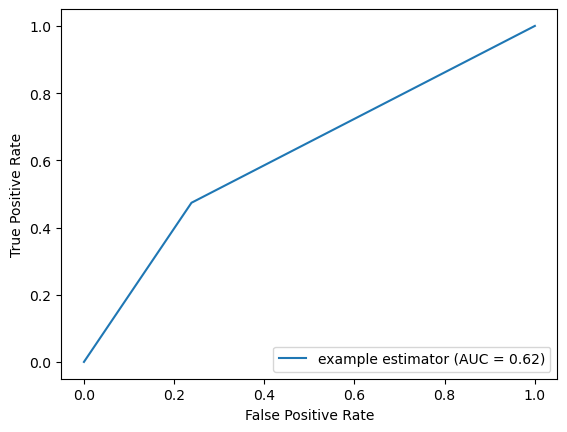

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(train_y, pred_train)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()

plt.show()

### For test set

In [86]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

precision, recall, f1score, support = precision_recall_fscore_support(test_y, pred_test, average = 'binary')


micro_roc_auc_ovr = roc_auc_score(
    test_y, pred_test,
    multi_class="ovr",
    average="micro",
)
print(
'the confusion matrix:', confusion_matrix(test_y, pred_test),'\n'
'the precision:', precision, '\n'
'the recall:', recall, '\n'
'the f1score:',f1score, '\n'
'AUC', micro_roc_auc_ovr
)

the confusion matrix: [[14  7]
 [ 6  4]] 
the precision: 0.36363636363636365 
the recall: 0.4 
the f1score: 0.380952380952381 
AUC 0.5333333333333333


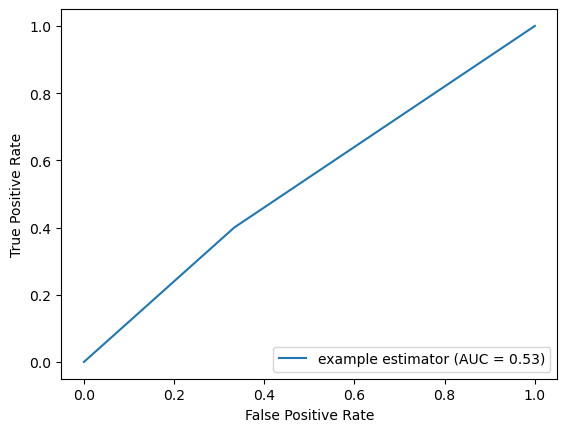

In [87]:
# reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions


fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()

plt.show()

## SMOTE
According to the sample size, we can find out that Non-recurrent (151 instances) is the common class, and Recurrent (47 instances) is uncommon class.

Hence, downsampling N in the training set to 90.

upsampling R in the training set to 90.

In [88]:
trainR = trainR.reset_index()
trainR.loc[len(trainR)] = data.loc[len(data)-2]
trainR

,index,ID,re,retime,1_m,2_m,3_m,4_m,5_m,6_m,...,3_w,4_w,5_w,6_w,7_w,8_w,9_w,10_w,dia_tumor,num_posi
0,4.0,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,...,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
1,5.0,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,...,107.3,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
2,7.0,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.16450,...,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
3,13.0,847990,R,36,14.54,27.54,96.73,658.8,0.11390,0.15950,...,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6
4,15.0,848620,R,10,16.13,20.68,108.10,798.8,0.11700,0.20220,...,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1
5,17.0,851509,R,10,21.16,23.04,137.20,1404.0,0.09428,0.10220,...,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,4.0,1
6,34.0,855625,R,9,19.07,24.81,128.30,1104.0,0.09081,0.21900,...,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380,2.3,0
7,37.0,857010,R,8,18.65,17.60,123.70,1076.0,0.10990,0.16860,...,150.6,1567.0,0.1679,0.5090,0.7345,0.2378,0.3799,0.09185,1.8,0
8,39.0,857438,R,48,15.10,22.02,97.26,712.8,0.09056,0.07081,...,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873,2.5,0
9,40.0,857637,R,11,19.21,18.57,125.50,1152.0,0.10530,0.12670,...,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294,3.2,13


In [89]:
# reference: https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
# reference: https://imbalanced-learn.org/stable/under_sampling.html

train2N, noneed = train_test_split(trainN, train_size=90,shuffle=True)
train2N = train2N.drop('ID',axis =1)
train2R = trainR.drop(['ID','index'],axis =1)
train2 = pd.concat([train2N, train2R],ignore_index=True)

train_2x = train2.iloc[:,2:32]
train_2y = train2['re']
train_2y = train_2y.replace('N',0)
train_2y = train_2y.replace('R',1)


In [90]:
sm = SMOTE(k_neighbors = 5)
x_res, y_res = sm.fit_resample(train_2x,train_2y)


In [91]:
pred_train2 = gnb.fit(x_res, y_res).predict(x_res)
pred_test2 = gnb.fit(x_res, y_res).predict(test_x)

### for training set with SMOTE

In [92]:
precision, recall, f1score, support = precision_recall_fscore_support(y_res, pred_train2, average = 'binary')


micro_roc_auc_ovr = roc_auc_score(
    y_res, pred_train2,
    multi_class="ovr",
    average="micro",
)
print(
'the confusion matrix:', confusion_matrix(y_res, pred_train2),'\n'
'the precision:', precision, '\n'
'the recall:', recall, '\n'
'the f1score:',f1score, '\n'
'AUC', micro_roc_auc_ovr
)

the confusion matrix: [[58 32]
 [33 57]] 
the precision: 0.6404494382022472 
the recall: 0.6333333333333333 
the f1score: 0.6368715083798883 
AUC 0.6388888888888888


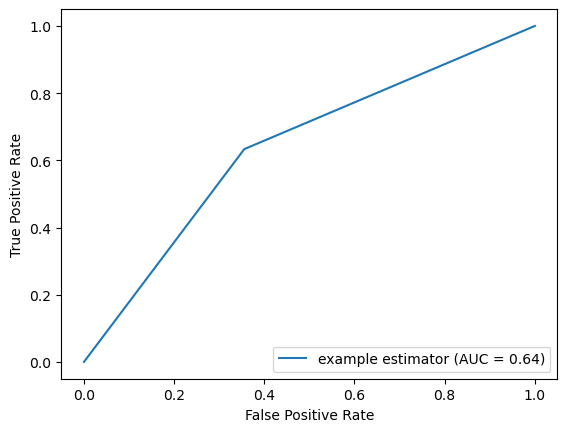

In [93]:
fpr, tpr, thresholds = metrics.roc_curve(y_res, pred_train2)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()

plt.show()

### for testing set with SMOTE

In [94]:
precision, recall, f1score, support = precision_recall_fscore_support(test_y, pred_test2, average = 'binary')


micro_roc_auc_ovr = roc_auc_score(
    test_y, pred_test2,
    multi_class="ovr",
    average="micro",
)
print(
'the confusion matrix:', confusion_matrix(test_y, pred_test2),'\n'
'the precision:', precision, '\n'
'the recall:', recall, '\n'
'the f1score:',f1score, '\n'
'AUC', micro_roc_auc_ovr
)

the confusion matrix: [[14  7]
 [ 5  5]] 
the precision: 0.4166666666666667 
the recall: 0.5 
the f1score: 0.45454545454545453 
AUC 0.5833333333333334


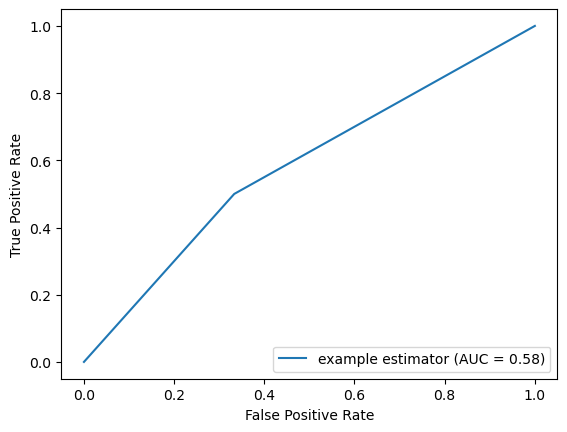

In [95]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_test2)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()

plt.show()

Q: Does SMOTE help?

A: Yes, SMOTE looks like help a little bit.